<a href="https://colab.research.google.com/github/Vyshnavi153/Applied-NLP/blob/main/Vyshnavi_Daka_HW6_FlanT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'indianred'> **1. Setting up the Environment** </font>

In [ ]:
import sys

In [ ]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')

  # Install the latest version of torchtext library quietly without showing output

  !pip install torchtext -qq
  !pip install transformers evaluate wandb datasets accelerate -U -qq
  !pip install -U spacy -qq
  !python -m spacy download en_core_web_sm -qq

  basepath = '/content/drive/MyDrive/data'
  sys.path.append('/content/drive/MyDrive/data/custom-functions')
else:
  basepath = 'D:/UTDallas/Courses/Spring 24/Applied NLP/Data Folder'

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.8 MB/s eta 0:

In [ ]:
# Importing PyTorch library for tensor computations and neural network modules
import torch
import torch.nn as nn

# For working with textual data vocabularies and for displaying model summaries
from torchtext.vocab import vocab

# General-purpose Python libraries for random number generation and numerical operations
import random
import numpy as np

# Utilities for efficient serialization/deserialization of Python objects and for element tallying
import joblib
from collections import Counter

# For creating lightweight attribute classes and for partial function application
from functools import partial

# For filesystem path handling, generating and displaying confusion matrices, and date-time manipulations
from pathlib import Path
from sklearn.metrics import confusion_matrix
from datetime import datetime

# For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

### NEW ##########################
# imports from Huggingface ecosystem
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import PreTrainedModel, PretrainedConfig
from transformers import TrainingArguments, Trainer
from datasets import load_dataset, DatasetDict, Dataset
from transformers import AutoTokenizer
# from transformers import DistilBertTokenizer, DistilBertModel
from transformers import AutoModelForSequenceClassification,AutoModelForSeq2SeqLM,T5ForConditionalGeneration
from transformers import AutoConfig
from transformers import pipeline
import evaluate

# wandb library
import wandb

In [ ]:
base_folder = Path(basepath)
data_folder = base_folder / 'datasets/emotion_detection'
model_folder = base_folder / 'models/nlp_spring_2024/emotion_detection'

In [ ]:
model_folder.mkdir(exist_ok=True, parents=True)
data_folder.mkdir(exist_ok=True, parents=True)

In [ ]:
# location of train and test files
train_file = data_folder / 'train.csv'
test_file = data_folder / 'test.csv'

# <font color = 'indianred'> **2. Load Data set**

In [ ]:
# creating Pandas Dataframe
import pandas as pd
train_data = pd.read_csv(train_file, index_col=0)
test_data = pd.read_csv(test_file)

In [ ]:
emotion_df = train_data.copy()
emotion_df['labels'] = emotion_df[train_data.columns[1:]].values.tolist()

In [ ]:
columns_to_plot = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
data_to_plot = emotion_df[columns_to_plot]

# <font color = 'indianred'> **3. Exploratory Data Analysis**</font>




In [ ]:
class_distribution = data_to_plot.sum()

<ipython-input-11-c5e97a74e7cd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


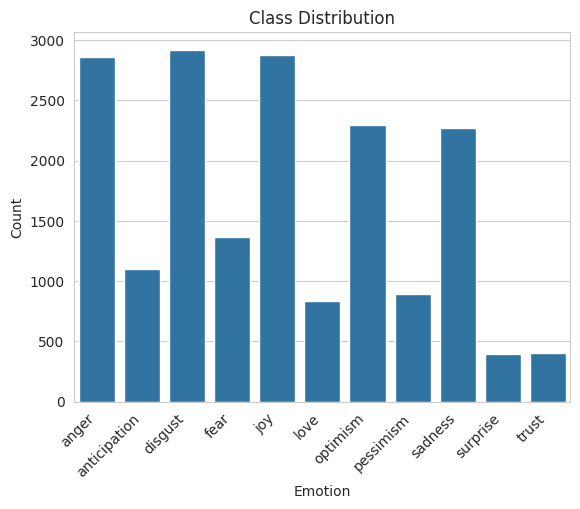

In [ ]:
sns.set_style('whitegrid')
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Emotion')
ax.set_ylabel('Count')
ax.set_title('Class Distribution')
plt.show()

In [ ]:
emotion_df['words_per_tweet'] = emotion_df['Tweet'].str.split().apply(len)

In [ ]:
emotion_df.head()

,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,labels,words_per_tweet
ID,,,,,,,,,,,,,,
2017-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]",17
2017-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]",11
2017-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]",22
2017-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]",19
2017-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",14


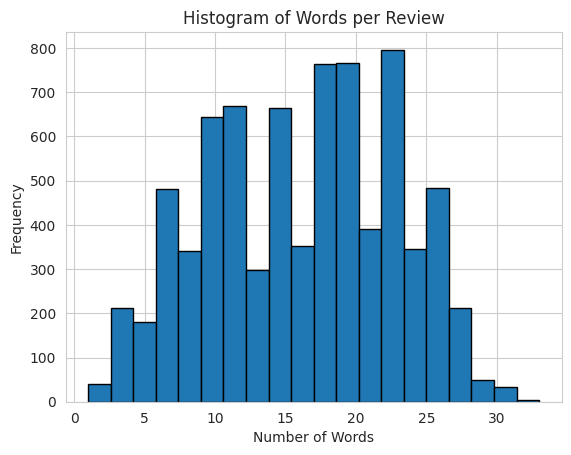

In [ ]:
words_per_tweet = emotion_df['words_per_tweet']

# Plot histogram
plt.hist(words_per_tweet, bins=20, edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Words per Review')
plt.grid(True)
plt.show()

In [ ]:
X_train = train_data.drop(columns = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism', 'pessimism', 'sadness', 'surprise', 'trust'])
X_train.head()

,Tweet
ID,
2017-21441,“Worry is a down payment on a problem you may ...
2017-31535,Whatever you decide to do make sure it makes y...
2017-21068,@Max_Kellerman it also helps that the majorit...
2017-31436,Accept the challenges so that you can literall...
2017-22195,My roommate: it's okay that we can't spell bec...


In [ ]:
y = train_data.iloc[:, 1:].to_numpy().astype(float)

In [ ]:
print(len(y[0]))

11


In [ ]:
labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism', 'pessimism', 'sadness', 'surprise', 'trust']
label_mapping = {id_: label_ for id_, label_ in enumerate(labels)}
label_mapping

{0: 'anger',
 1: 'anticipation',
 2: 'disgust',
 3: 'fear',
 4: 'joy',
 5: 'love',
 6: 'optimism',
 7: 'pessimism',
 8: 'sadness',
 9: 'surprise',
 10: 'trust'}

In [ ]:
def labels_to_text(ohe_vector):
    indices = np.where(np.array(ohe_vector) == 1)[0]
    labels = [label_mapping[idx] for idx in indices]
    return ', '.join(labels)

In [ ]:
emotion_df['emotion'] = emotion_df['labels'].apply(labels_to_text)

In [ ]:
X_train = emotion_df.drop(columns = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'labels', 'words_per_tweet', 'emotion'])
X_train.head()

,Tweet
ID,
2017-21441,“Worry is a down payment on a problem you may ...
2017-31535,Whatever you decide to do make sure it makes y...
2017-21068,@Max_Kellerman it also helps that the majorit...
2017-31436,Accept the challenges so that you can literall...
2017-22195,My roommate: it's okay that we can't spell bec...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
import CustomPreprocessorSpacy as cp

In [ ]:
X_train_len = len(X_train)
print(X_train_len)

7724


# <font color = 'indianred'> **3. Basic Preprocessing**</font>

In [ ]:
preprocessor = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size=X_train_len, lemmatize=False, lower=False,
                                    remove_stop=False, remove_punct=False, remove_email=False,
                                    remove_url=False, remove_num=False, stemming=False,
                                    add_user_mention_prefix=False, remove_hashtag_prefix=False, basic_clean_only=True)
X_train_clean = preprocessor.fit_transform(list(X_train['Tweet']))

/content/drive/MyDrive/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
X_train_clean[:2]

["“Worry is a down payment on a problem you may never have'. \xa0Joyce Meyer.  #motivation #leadership #worry",
 'Whatever you decide to do make sure it makes you #happy.']

In [ ]:
X_train.head()

,Tweet
ID,
2017-21441,“Worry is a down payment on a problem you may ...
2017-31535,Whatever you decide to do make sure it makes y...
2017-21068,@Max_Kellerman it also helps that the majorit...
2017-31436,Accept the challenges so that you can literall...
2017-22195,My roommate: it's okay that we can't spell bec...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_train_clean, y, test_size = 0.3, random_state = 42)

# Splitting the temporary set into validation and test sets (50% - 50% of 30%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

5406
1159
1159


In [ ]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(5406, 11)
(1159, 11)
(1159, 11)


In [ ]:
trainset = Dataset.from_dict({
    'texts': X_train,
    'labels': y_train
})

validset = Dataset.from_dict({
    'texts': X_valid,
    'labels': y_valid
})

testset = Dataset.from_dict({
    'texts': X_test,
    'labels': y_test
})

In [ ]:
train_val = DatasetDict(
    {"train": trainset, "valid": validset})

In [ ]:
train_val['train'][:2]

{'texts': ['@KMunie7 @KaranEsch Helluva lot more animated than they were for the actual game >.<',
  "Despite my sharing O'Neill's article, what saddens me about the Gazza case is there seems to be more fury about the sentence than the remark"],
 'labels': [[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
  [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]}

# <font color = 'indianred'>**4. Load pre-trained Tokenizer**</font>

In [ ]:
from transformers import T5Tokenizer

In [ ]:
checkpoint = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# tokenizer = T5Tokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [ ]:
# flan_data_train = []

# for text, label in zip(train_val['train']['texts'], train_val['train']['labels']):
#     label_names = labels
#     label_str = ' '.join([f"{label_name}:{int(val)}" for label_name, val in zip(label_names, label)])
#     flan_data_train.append(f"{text} {label_str}")

# # print("\n".join(flan_data))
# flan_data_valid = []

# for text, label in zip(train_val['valid']['texts'], train_val['valid']['labels']):
#     label_names = labels
#     label_str = ' '.join([f"{label_name}:{int(val)}" for label_name, val in zip(label_names, label)])
#     flan_data_valid.append(f"{text} {label_str}")
# flan_data_train[:2]

In [ ]:
# def tokenize_fn(batch):
#      return tokenizer(text = batch["texts"], truncation=True)

In [ ]:
type(train_val['train']['labels'])

list

#<font color = 'indianred'> **5. Create function for Tokenizer**

In [ ]:
# def preprocess_data(batch):
#   prefix = "classify text into emotions:"
#   inputs = tokenizer([prefix + text for text in [x['texts'] for x in batch]], padding=True, truncation=True, return_tensors='pt')
#   labels = torch.tensor([x['labels'] for x in batch])

  # prefix = "classify text into emotions:"
  # batch['prefix'] = ['t5-encode' for x in range(len(batch))]
  # batch['labels'] = [' '.join(map(str, label)) for label in batch["labels"]] #batch['labels'].astype(str)

def tokenize_fn(batch):
    return tokenizer(text = batch["texts"], truncation=True)

In [ ]:
# def tokenize_fn(example):
#     start_prompt = 'Classify text into emotions:\n'
#     end_prompt = '\nClassification:'

#     prompt = [start_prompt + text + end_prompt for text in example["texts"]]
#     # print(prompt)

#     example['input_ids'] = tokenizer(prompt, truncation=True).input_ids

#     # Tokenize the labels
#     if isinstance(example["labels"], str):
#         print(type(example['labels']))
#         # If the labels are a single string, tokenize it directly
#         label_ids = tokenizer(example["labels"], truncation=True).input_ids
#     elif isinstance(example["labels"], list):
#         print('I am here',type(example['labels']))
#         # If the labels are a list of strings, tokenize each label and concatenate the results
#         label_ids = tokenizer(list(map(str, example['labels'])), truncation=True).input_ids
#     else:
#         # If the labels are in an unexpected format, raise an error
#         raise ValueError(f"Unexpected format for labels: {type(example['labels'])}")

#     # Squeeze the label_ids tensor to remove the batch dimension
#     # example['labels'] = label_ids.squeeze(0)

#     return example
# #Transormers parameter efficient training - to check out

In [ ]:
print(type(train_val['train']['labels'][0]))
train_val['train']['labels'][0]

<class 'list'>


[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
tokenized_dataset = train_val.map(tokenize_fn, batched=True)

Map:   0%|          | 0/5406 [00:00<?, ? examples/s]

Map:   0%|          | 0/1159 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_dataset)

DatasetDict({
    train: Dataset({
        features: ['texts', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 5406
    })
    valid: Dataset({
        features: ['texts', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 1159
    })
})


In [ ]:
tokenized_dataset = tokenized_dataset.remove_columns(['texts'])

In [ ]:
# print(tokenized_dataset)

In [ ]:
id2label= {id_: label_ for id_, label_ in enumerate(labels)}
label2id = {label_: id_ for id_, label_ in enumerate(labels)}

#  <font color = 'indianred'> **6. Model Training**

##  <font color = 'indianred'> **6.1 Download pre-trained model**

In [ ]:
num_labels = 11
model_3 = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels, problem_type="multi_label_classification")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at google/flan-t5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_3

T5ForSequenceClassification(
  (transformer): T5Model(
    (shared): Embedding(32128, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseGatedActDense(
                (wi_0): Linear(in_features=768, out_features=2048, bias=False)
                (wi_1): Linea

##  <font color = 'indianred'> **6.2 Downaload and Modify Model Config File**

In [ ]:
config = AutoConfig.from_pretrained(checkpoint)
id2label= {id_: label_ for id_, label_ in enumerate(labels)}
label2id = {label_: id_ for id_, label_ in enumerate(labels)}
config.id2label = id2label
config.label2id = label2id
model_3.config = config

##  <font color = 'indianred'> **6.3 compute_metrics function** </font>



In [ ]:
accuracy_metric = evaluate.load('accuracy', 'multilabel')
f1 = evaluate.load('f1','multilabel')
def compute_metrics(eval_pred):
    # accuracy_metric = evaluate.load('accuracy', 'multilabel')

    logits, labels = eval_pred
    # print(logits.shape)
    logits = logits[0]
    preds = (logits >= 0.5).astype(int)
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    f1_micro = f1.compute(predictions=preds, references=labels, average='micro')
    f1_macro = f1.compute(predictions=preds, references=labels, average='macro')
    return {'f1_micro':f1_micro['f1'],
            'f1_macro':f1_macro['f1'],
            'accuracy':accuracy['accuracy'],
            }

## <font color = 'indianred'> **6.4 Training Arguments**</font>







In [ ]:
# Define the directory where model checkpoints will be saved
run_name = "tweet_emotion_data_flanT5_model_new"
base_folder = Path(basepath)
model_folder = base_folder / "models"/run_name
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = TrainingArguments(
    # Training-specific configurations
    num_train_epochs=5,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    #gradient_accumulation_steps = 8,
    # auto_find_batch_size=True,
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=2e-5,  # Step size for the optimizer during training
    optim='adamw_torch',  # Optimizer,
    max_grad_norm= 1.0,

    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=100,  # Perform evaluation every 10 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=100,  # Save a model checkpoint every 10 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    # Use 'accuracy' as the metric to determine the best model
    metric_for_best_model="accuracy",
    greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=100,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name=run_name,  # Experiment name for Weights & Biases

    fp16=False,
    bf16=False,
    tf32=False,


 )

##  <font color = 'indianred'> **6.5 Initialize Trainer**</font>



In [ ]:
# initialize trainer

trainer = Trainer(
    model=model_3,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['valid'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


## <font color = 'indianred'> **6.6 Setup WandB**</font>

In [ ]:
wandb.login()
%env WANDB_PROJECT = emotion_flanT5_final

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_PROJECT=emotion_flanT5_final


##  <font color = 'indianred'> **6.7 Training and Validation**

In [ ]:
trainer.train()

wandb: Currently logged in as: dakavyshnavi (vyshnavi-utd). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,F1 Micro,F1 Macro,Accuracy
100,0.548700,0.469567,0.000000,0.000000,0.026747
200,0.471300,0.456556,0.000000,0.000000,0.026747
300,0.445200,0.402068,0.257259,0.118376,0.062985
400,0.410300,0.370978,0.514828,0.250939,0.163072
500,0.387500,0.360183,0.531138,0.264256,0.169974
600,0.368900,0.355534,0.555450,0.295710,0.178602
700,0.363700,0.349437,0.579456,0.313123,0.193270
800,0.349100,0.345901,0.587065,0.325883,0.192407
900,0.354400,0.341850,0.584022,0.322204,0.197584
1000,0.347300,0.337880,0.590350,0.338854,0.198447


There were missing keys in the checkpoint model loaded: ['transformer.encoder.embed_tokens.weight', 'transformer.decoder.embed_tokens.weight'].


TrainOutput(global_step=1690, training_loss=0.37571511014678777, metrics={'train_runtime': 527.701, 'train_samples_per_second': 51.222, 'train_steps_per_second': 3.203, 'total_flos': 1700939305920288.0, 'train_loss': 0.37571511014678777, 'epoch': 5.0})

<font color = 'indianred'> *Evaluate model on Validation Set* </font>


In [ ]:
eval_results = trainer.evaluate(tokenized_dataset["valid"])

In [ ]:
eval_results

{'eval_loss': 0.3297712504863739,
 'eval_f1_micro': 0.6095751854349293,
 'eval_f1_macro': 0.3793839437430103,
 'eval_accuracy': 0.2079378774805867,
 'eval_runtime': 3.6353,
 'eval_samples_per_second': 318.822,
 'eval_steps_per_second': 20.081,
 'epoch': 5.0}

In [ ]:
wandb.log({"eval_accuracy": eval_results["eval_accuracy"], "eval_loss": eval_results["eval_loss"], "eval_f1": eval_results["eval_f1_macro"]})

In [ ]:
valid_output = trainer.predict(tokenized_dataset["valid"])

In [ ]:
valid_preds = (valid_output.predictions[0] >= 0.5).astype(float)
valid_labels = np.array(valid_output.label_ids)

In [ ]:
print(valid_preds[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
cm = multilabel_confusion_matrix(y_true = valid_labels, y_pred = valid_preds)
for i, matrix in enumerate(cm):
    print(f'Confusion matrix for class {i}:')
    print(matrix)

Confusion matrix for class 0:
[[663  68]
 [133 295]]
Confusion matrix for class 1:
[[1008    0]
 [ 151    0]]
Confusion matrix for class 2:
[[614  90]
 [159 296]]
Confusion matrix for class 3:
[[947   2]
 [174  36]]
Confusion matrix for class 4:
[[674  64]
 [ 95 326]]
Confusion matrix for class 5:
[[1029   12]
 [  88   30]]
Confusion matrix for class 6:
[[750  95]
 [109 205]]
Confusion matrix for class 7:
[[1019    0]
 [ 140    0]]
Confusion matrix for class 8:
[[754  64]
 [173 168]]
Confusion matrix for class 9:
[[1091    0]
 [  68    0]]
Confusion matrix for class 10:
[[1107    0]
 [  52    0]]


<font color = 'indianred'> *Get best checkpoint*</font>


In [ ]:
# After training, let us check the best checkpoint
# We need this for Inference
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 1500.


In [ ]:
checkpoint = str(model_folder/f'checkpoint-{best_model_checkpoint_step}')
checkpoint

'/content/drive/MyDrive/data/models/tweet_emotion_data_flanT5_model_new/checkpoint-1500'

#  <font color = 'indianred'> **7. Performance on Test Set** </font>

For test set evaluation, we will perfrom following steps:



In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
test_set_tokenized = testset.map(tokenize_fn, batched=True)

Map:   0%|          | 0/1159 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=16,
    do_train=False,
    do_eval=True,
    report_to=[],
    run_name=run_name
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=test_set_tokenized,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
test_results= trainer.evaluate()

In [ ]:
test_results

{'eval_loss': 0.3359808921813965,
 'eval_f1_micro': 0.6044843049327354,
 'eval_f1_macro': 0.38137168530058096,
 'eval_accuracy': 0.21225194132873165,
 'eval_runtime': 3.9898,
 'eval_samples_per_second': 290.491,
 'eval_steps_per_second': 18.297}

In [ ]:
test_output = trainer.predict(test_set_tokenized)

In [ ]:
test_preds = (test_output.predictions[0] >= 0.5).astype(float)
test_labels = np.array(test_output.label_ids)

In [ ]:
test_preds[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
cm_test = multilabel_confusion_matrix(y_true = test_labels, y_pred = test_preds)
for i, matrix in enumerate(cm_test):
    print(f'Confusion matrix for class {i}:')
    print(matrix)

Confusion matrix for class 0:
[[679  60]
 [132 288]]
Confusion matrix for class 1:
[[972   0]
 [187   0]]
Confusion matrix for class 2:
[[646  93]
 [146 274]]
Confusion matrix for class 3:
[[935   1]
 [187  36]]
Confusion matrix for class 4:
[[647  58]
 [116 338]]
Confusion matrix for class 5:
[[1031   11]
 [  84   33]]
Confusion matrix for class 6:
[[720  83]
 [140 216]]
Confusion matrix for class 7:
[[1021    0]
 [ 138    0]]
Confusion matrix for class 8:
[[785  50]
 [161 163]]
Confusion matrix for class 9:
[[1106    0]
 [  53    0]]
Confusion matrix for class 10:
[[1095    0]
 [  64    0]]


In [ ]:
wandb.finish()

eval/accuracy,▁▁▂▆▇▇▇▇█████████
eval/f1_macro,▁▁▃▆▆▆▇▇▇▇███████
eval/f1_micro,▁▁▄▇▇▇███████████
eval/loss,█▇▅▃▃▂▂▂▂▁▁▁▁▁▁▁▁
eval/runtime,▂█▁▁▂▂▁▂▁▂▁▁▁▁▂▂▁
eval/samples_per_second,▇▁██▇▇█▇█▇████▇▇█
eval/steps_per_second,▇▁██▇▇█▇█▇████▇▇█
eval_accuracy,▁
eval_f1,▁
eval_loss,▁
train/epoch,▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇████


In [ ]:
checkpoint = str(model_folder/f'checkpoint-{best_model_checkpoint_step}')
custom_pipeline = pipeline(
    task="text-classification",
    model=checkpoint,
    tokenizer=checkpoint,
    device=0)

In [ ]:
predictions = custom_pipeline(testset['texts'], truncation=True)

In [ ]:
predictions[0:10]

[{'label': 'fear', 'score': 0.6425525546073914},
 {'label': 'disgust', 'score': 0.5639925599098206},
 {'label': 'optimism', 'score': 0.39289769530296326},
 {'label': 'sadness', 'score': 0.9149484634399414},
 {'label': 'optimism', 'score': 0.6007828712463379},
 {'label': 'disgust', 'score': 0.9617387056350708},
 {'label': 'disgust', 'score': 0.8457446694374084},
 {'label': 'anger', 'score': 0.936150312423706},
 {'label': 'joy', 'score': 0.9133613109588623},
 {'label': 'disgust', 'score': 0.6760616898536682}]